# YOLOv5 Classification Tutorial

YOLOv5 supports classification tasks too. This is the official YOLOv5 classification notebook tutorial. YOLOv5 is maintained by [Ultralytics](https://github.com/ultralytics/yolov5).

This notebook covers:

*   Inference with out-of-the-box YOLOv5 classification on ImageNet
*  [Training YOLOv5 classification](https://blog.roboflow.com//train-YOLOv5-classification-custom-data) on custom data

*Looking for custom data? Explore over 66M community datasets on [Roboflow Universe](https://universe.roboflow.com).*

This notebook was created with Google Colab. [Click here](https://colab.research.google.com/drive/1FiSNz9f_nT8aFtDEU3iDAQKlPT8SCVni?usp=sharing) to run it.

# Setup

Pull in respective libraries to prepare the notebook environment.

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-347-gd6112173 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)


Setup complete ✅ (12 CPUs, 53.0 GB RAM, 30.2/78.2 GB disk)


# 1. Infer on ImageNet

To demonstrate YOLOv5 classification, we'll leverage an already trained model. In this case, we'll download the ImageNet trained models pretrained on ImageNet using YOLOv5 Utils.

In [ ]:
from utils.downloads import attempt_download

p5 = ['n', 's', 'm', 'l', 'x']  # P5 models
cls = [f'{x}-cls' for x in p5]  # classification models

for x in cls:
    attempt_download(f'weights/yolov5{x}.pt')

100%|██████████| 4.87M/4.87M [00:00<00:00, 87.9MB/s]

100%|██████████| 10.5M/10.5M [00:00<00:00, 161MB/s]

100%|██████████| 24.9M/24.9M [00:00<00:00, 72.5MB/s]

100%|██████████| 50.9M/50.9M [00:00<00:00, 288MB/s]

100%|██████████| 92.0M/92.0M [00:00<00:00, 306MB/s]



Now, we can infer on an example image from the ImageNet dataset.

In [ ]:
#Download example image
import requests
image_url = "https://i.imgur.com/OczPfaz.jpg"
response = requests.get(image_url)
response.raise_for_status()
with open('bananas.jpg', 'wb') as handler:
    handler.write(response.content)

HTTPError: 429 Client Error: Unknown Error for url: https://i.imgur.com/OczPfaz.jpg

In [ ]:
#Infer using classify/predict.py
!python classify/predict.py --weights ./weigths/yolov5s-cls.pt --source bananas.jpg

From the output, we can see the ImageNet trained model correctly predicts the class `banana` with `0.95` confidence.

## 2. (Optional) Validate

Use the `classify/val.py` script to run validation for the model. This will show us the model's performance on each class.

First, we need to download ImageNet.

In [ ]:
# # WARNING: takes ~20 minutes
# !bash data/scripts/get_imagenet.sh --val

In [ ]:
# # run the validation script
# !python classify/val.py --weights ./weigths/yolov5s-cls.pt --data ../datasets/imagenet

The output shows accuracy metrics for the ImageNet validation dataset including per class accuracy.

# 3. Train On Custom Data

To train on custom data, we need to prepare a dataset with custom labels.

To prepare custom data, we'll use [Roboflow](https://roboflow.com). Roboflow enables easy dataset prep with your team, including labeling, formatting into the right export format, deploying, and active learning with a `pip` package.

If you need custom data, there are over 66M open source images from the community on [Roboflow Universe](https://universe.roboflow.com).

(For more guidance, here's a detailed blog on [training YOLOv5 classification on custom data](https://blog.roboflow.com/train-YOLOv5-classification-custom-data).)


Create a free Roboflow account, upload your data, and label.

![](https://s4.gifyu.com/images/fruit-labeling.gif)

### Load Custom Dataset

Next, we'll export our dataset into the right directory structure for training YOLOv5 classification to load into this notebook. Select the `Export` button at the top of the version page, `Folder Structure` type, and `show download code`.

The ensures all our directories are in the right format:

```
dataset
├── train
│   ├── class-one
│   │   ├── IMG_123.jpg
│   └── class-two
│       ├── IMG_456.jpg
├── valid
│   ├── class-one
│   │   ├── IMG_789.jpg
│   └── class-two
│       ├── IMG_101.jpg
├── test
│   ├── class-one
│   │   ├── IMG_121.jpg
│   └── class-two
│       ├── IMG_341.jpg
```

![](https://i.imgur.com/BF9BNR8.gif)


Copy and paste that snippet into the cell below.

In [ ]:
# Ensure we're in the right directory to download our custom dataset
import os
os.makedirs("../datasets/", exist_ok=True)
%cd ../datasets/

/content/datasets


In [ ]:
!rm -rf /content//datasets/wayang-classification-2

In [ ]:
# REPLACE the below with your exported code snippet from above
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="HU0KQOY2GSY0RRF4ye5w")
project = rf.workspace("wayang-cumb2").project("wayang-classification")
version = project.version(4)
dataset = version.download("folder")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to wayang-classification-4 in folder:: 100%|██████████| 255/255 [00:00<00:00, 9216.58it/s]


In [ ]:
%cd /content/yolov5

/content/yolov5


In [ ]:
#Save the dataset name to the environment so we can use it in a system call later
dataset_name = dataset.location.split(os.sep)[-1]
os.environ["DATASET_NAME"] = dataset_name

### Train On Custom Data 🎉
Here, we use the DATASET_NAME environment variable to pass our dataset to the `--data` parameter.

Note: we're training for 100 epochs here. We're also starting training from the pretrained weights. Larger datasets will likely benefit from longer training.

In [ ]:

!python classify/train.py --model yolov5m-cls.pt --data $DATASET_NAME --epochs 50 --img 224 --pretrained weights/yolov5m-cls.pt

2024-07-25 09:50:06.986070: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-25 09:50:06.986122: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-25 09:50:06.987697: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
classify/train: model=yolov5m-cls.pt, data=wayang-classification-4, epochs=50, batch_size=64, imgsz=224, nosave=False, cache=None, device=, workers=8, project=runs/train-cls, name=exp, exist_ok=False, pretrained=weights/yolov5m-cls.pt, optimizer=Adam, lr0=0.001, decay=5e-05, label_smoothing=0.1, cutoff=None, dropout=None, verbose=False, seed=0, local_rank=-1
gith

### Validate Your Custom Model

Repeat step 2 from above to test and validate your custom model.

In [ ]:
!python classify/val.py --weights /content/yolov5/runs/train-cls/exp2/weights/best.pt --data /content/datasets/$DATASET_NAME

classify/val: data=/content/datasets/wayang-classification-4, weights=['/content/yolov5/runs/train-cls/exp2/weights/best.pt'], batch_size=128, imgsz=224, device=, workers=8, verbose=True, project=runs/val-cls, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-347-gd6112173 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)

Fusing layers... 
Model summary: 166 layers, 11673878 parameters, 0 gradients, 30.6 GFLOPs
testing: 100% 1/1 [00:00<00:00,  1.76it/s]
                   Class      Images    top1_acc    top5_acc
                     all          23       0.478       0.913
                   Beber           4           1           1
                   Gedog           3       0.667           1
                   Golek           4        0.25        0.75
                  Krucil           4           0           1
                   Kulit           5         0.8           1
                   Suluh           3           0       0.667
Speed: 0.1ms pre-process, 17.

### Infer With Your Custom Model

In [ ]:

# # Path ke set tes atau validasi
# if os.path.exists(os.path.join(dataset.location, "/content/datasets/wayang-classification-2/test/*/*.jpg")):
#     split_path = os.path.join(dataset.location, "/content/datasets/wayang-classification-2/test/*/*.jpg")
# else:
#     split_path = os.path.join(dataset.location, "valid")

# # Simpan path set tes atau validasi ke variabel lingkungan
# os.environ["TEST_IMAGE_DIR"] = split_path

# print(f"Inferring on all images in '{split_path}'")

# Jalankan inferensi pada semua gambar dalam direktori
!python classify/predict.py --weights /content/yolov5/runs/train-cls/exp2/weights/best.pt --source "/content/datasets/wayang-classification-4/test/*/*.jpg" --save-txt


classify/predict: weights=['/content/yolov5/runs/train-cls/exp2/weights/best.pt'], source=/content/datasets/wayang-classification-4/test/*/*.jpg, data=data/coco128.yaml, imgsz=[224, 224], device=, view_img=False, save_txt=True, nosave=False, augment=False, visualize=False, update=False, project=runs/predict-cls, name=exp, exist_ok=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-347-gd6112173 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)

Fusing layers... 
Model summary: 166 layers, 11673878 parameters, 0 gradients, 30.6 GFLOPs
image 1/23 /content/datasets/wayang-classification-4/test/Beber/11-1_jpg.rf.fd65b38e83090845578a2bda285880e9.jpg: 224x224 Beber 0.94, Kulit 0.02, Krucil 0.02, Gedog 0.02, Golek 0.00, 4.5ms
image 2/23 /content/datasets/wayang-classification-4/test/Beber/Wayang-Beber-Kesenian-Gunungkidul-Warisan-Eksentrik-dan-Eksotik_jpg.rf.ac0a4d9c7863721aeeace320aad942ac.jpg: 224x224 Beber 0.90, Kulit 0.03, Gedog 0.03, Krucil 0.03, Golek 0.01, 4.7ms
image

We can see the inference results show ~3ms inference and the respective classes predicted probabilities.

In [ ]:
import pathlib

In [ ]:
import os
import glob
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# # Langkah 1: Tentukan path ke set tes atau validasi
# if os.path.exists(os.path.join(dataset.location, "test")):
#     split_path = os.path.join(dataset.location, "test")
# # else:
# #     split_path = os.path.join(dataset.location, "valid")

# # # Menyimpan path set tes atau validasi ke variabel lingkungan
# # os.environ["TEST_IMAGE_DIR"] = split_path

# # Jalankan inferensi pada semua gambar dalam direktori dan simpan prediksinya
# !python classify/predict.py --weights ../best.pt --source $"/content/datasets/wayang-classification-2/test/*/*.jpg" --save-txt

# # Langkah 2: Mengumpulkan prediksi dan label sebenarnya
true_labels = []
pred_labels = []

# Memetakan nama kelas ke indeks
# class_map = {class_name: idx for idx, class_name in enumerate(class_names)}

# Baca file prediksi
pred_files = glob.glob('/content/datasets/wayang-classification-4/test/*/*.jpg')
for pred_file in pred_files:
    file_name = pathlib.Path(pred_file).name
    parent = pathlib.Path(pred_file).parent.name
    true_label = parent
    pred_file = "/content/yolov5/runs/predict-cls/exp5/labels/"+file_name.replace(".jpg", ".txt")
    # print(pred_file)
    with open(pred_file, 'r') as f:
          pred_line = f.readline().strip().split()
          if pred_line: # Check if the line is not empty
            pred_label = pred_line[1] # Get the first element (class index) and convert to integer
            pred_labels.append(pred_label)

    # Ambil label sebenarnya dari path file
    true_labels.append(true_label)

print(true_labels)
print(pred_labels)

['Golek', 'Golek', 'Golek', 'Golek', 'Krucil', 'Krucil', 'Krucil', 'Krucil', 'Suluh', 'Suluh', 'Suluh', 'Gedog', 'Gedog', 'Gedog', 'Kulit', 'Kulit', 'Kulit', 'Kulit', 'Kulit', 'Beber', 'Beber', 'Beber', 'Beber']
['Kulit', 'Golek', 'Gedog', 'Krucil', 'Kulit', 'Golek', 'Kulit', 'Kulit', 'Beber', 'Kulit', 'Beber', 'Gedog', 'Kulit', 'Gedog', 'Beber', 'Kulit', 'Kulit', 'Kulit', 'Kulit', 'Beber', 'Beber', 'Beber', 'Beber']


In [ ]:
class_names = os.listdir("/content/datasets/wayang-classification-4/test")

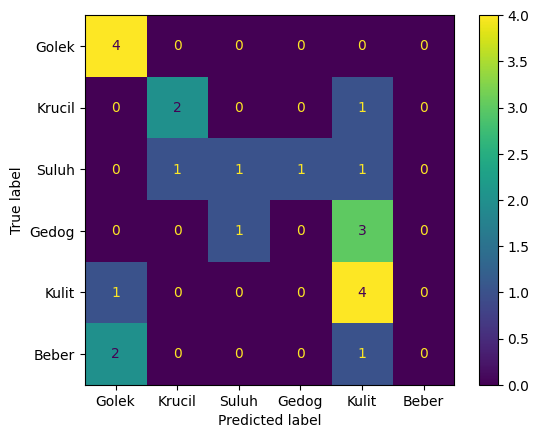

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Buat confusion matrix
cm =confusion_matrix(true_labels, pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import pandas as pd

# Calculate the metrics
precision = precision_score(true_labels, pred_labels, average=None)
recall = recall_score(true_labels, pred_labels, average=None)
f1 = f1_score(true_labels, pred_labels, average=None)
accuracy = accuracy_score(true_labels, pred_labels)

table_data = []
labels = class_names
for i in range(len(labels)):
    label = labels[i]
    table_data.append([label, precision[i], recall[i], f1[i]])
table_data.append(["Overall Accuracy",'' , '', accuracy])

# Create DataFrame
df = pd.DataFrame(table_data, columns=["Class", "Precision", "Recall", "F1-Score"])

In [ ]:
df

,Class,Precision,Recall,F1-Score
0,Golek,0.571429,1.0,0.727273
1,Krucil,0.666667,0.666667,0.666667
2,Suluh,0.5,0.25,0.333333
3,Gedog,0.0,0.0,0.000000
4,Kulit,0.4,0.8,0.533333
5,Beber,0.0,0.0,0.000000
6,Overall Accuracy,,,0.478261


## (OPTIONAL) Improve Our Model with Active Learning

Now that we've trained our model once, we will want to continue to improve its performance. Improvement is largely dependent on improving our dataset.

We can programmatically upload example failure images back to our custom dataset based on conditions (like seeing an underrpresented class or a low confidence score) using the same `pip` package.

In [ ]:
# # Upload example image
# project.upload(image_path)


In [ ]:
# # Example upload code
# min_conf = float("inf")
# for pred in results:
#     if pred["score"] < min_conf:
#         min_conf = pred["score"]
# if min_conf < 0.4:
#     project.upload(image_path)

# (BONUS) YOLOv5 classify/predict.py Accepts Several Input Methods
- Webcam: `python classify/predict.py --weights yolov5s-cls.pt --source 0`
- Image `python classify/predict.py --weights yolov5s-cls.pt --source img.jpg`
- Video: `python classify/predict.py --weights yolov5s-cls.pt --source vid.mp4`
- Directory: `python classify/predict.py --weights yolov5s-cls.pt --source path/`
- Glob: `python classify/predict.py --weights yolov5s-cls.pt --source 'path/*.jpg'`
- YouTube: `python classify/predict.py --weights yolov5s-cls.pt --source 'https://youtu.be/Zgi9g1ksQHc'`
- RTSP, RTMP, HTTP stream: `python classify/predict.py --weights yolov5s-cls.pt --source 'rtsp://example.com/media.mp4'`

###Directory Example

In [ ]:
#Directory infer
os.environ["TEST_CLASS_PATH"] = test_class_path = os.path.join(*os.environ["TEST_IMAGE_PATH"].split(os.sep)[:-1])
print(f"Infering on all images from the directory {os.environ['TEST_CLASS_PATH']}")
!python classify/predict.py --weights runs/train-cls/exp/weights/best.pt --source /$TEST_CLASS_PATH/

###YouTube Example

In [ ]:
#YouTube infer
!python classify/predict.py --weights runs/train-cls/exp/weights/best.pt --source 'https://www.youtube.com/watch?v=7AlYA4ItA74'

In [ ]:
lr=2e-5
valsa=f"{lr:.5f}"
print(valsa)

0.00002
